In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
data = pd.read_csv("mutual_fund.csv", skiprows=1,
                   names=['fund_number', 'Name', 'Manager', 'Trustee', 'Guarantee Liquidity', 'Investment Managers',
               'Auditor', 'Starting Date', 'Website', 'Type/Size','Date Updated', 'Total NAV(Rls)',
                'Total UNITs', 'The issue price per Unit (IRR)','Redemption price per unit (IRR)',
                'Statistical price per unit (IRR)','The number of individual investors-percent owned',
               'The number of institutional investors-percent owned','Guaranteed interest rate (%)',
               'Expected Profit Rate (%)', 'Profit Split Periods (months)', 'Last 1 day (%)',
               'Last 7 days (%)', 'Last 30 days (%)', 'Last 90 days (%)',
               'Last 180 days (%)', 'Last 365 days (%)', 'Since established date (%)','nav_unit'])

In [3]:
numberOfSamples = data.shape[0]
numberOfFeatures = data.shape[1]
print( "- Number of data points: {0} \n- Number of features: {1}" .format(numberOfSamples, numberOfFeatures))

- Number of data points: 191 
- Number of features: 29


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 29 columns):
fund_number                                            191 non-null int64
Name                                                   191 non-null object
Manager                                                191 non-null object
Trustee                                                191 non-null object
Guarantee Liquidity                                    158 non-null object
Investment Managers                                    189 non-null object
Auditor                                                191 non-null object
Starting Date                                          191 non-null object
Website                                                189 non-null object
Type/Size                                              191 non-null object
Date Updated                                           191 non-null object
Total NAV(Rls)                                         191 non-null obj

In [5]:
data.head()

fund_number                         Name  \
0        11569         با درآمد ثابت تصمیم   
1        11518  با درآمد ثابت فیروزه آسیا   
2        11334           اندیشه خبرگان سهام   
3        11145          اندوخته پایدار سپهر   
4        11449                   اعتماد ملل   

                             Manager  \
0  سبدگردان تصميم نگار ارزش آفرينان   
1         شركت كارگزاري فيروزه آسيا   
2          مدير-كارگزاري خبرگان سهام   
3             شركت تامين سرمايه سپهر   
4       شركت سبدگردان نوين نگر آسيا   

                                            Trustee Guarantee Liquidity  \
0                      مؤسسه حسابرسي آزموده كاران               ندارد   
1                   موسسه حسابرسي و خدمات مالي فاطر       ندارد ? ندارد   
2  متولي- شركت مشاور سرمايه گذاري تامين سرمايه نوين                ضامن   
3      موسسه حسابرسي و خدمات مديريت ارقام نگر آريا   بانك صادرات ايران   
4                           موسسه حسابرسي داريا روش               ندارد   

                                 Investment Managers  \
0  سجاد سیاح، سید مرتضی لعل سجادی، آمنه شکری قشلاقی   
1        امیرمحمد خدیوی، مجيد علي فر، فرزانه هاشم لو   
2      محمد خیری، جواد جمشید پور پزانی، افسانه قاسمی   
3  مهدي آسيما، الهام خواجه نصیری، سید علی خسرو شاهی   
4                                        امين گلواني   

                              Auditor Starting Date                  Website  \
0   مؤسسه حسابرسي آرمان آروين پارس    1397/03/21  www.tasmimfixedincom.ir   
1       موسسه حسابرسي وانيا نيك تدبير    1396/10/09   www.firouzehfixetf.com   
2          موسسه حسابرسي شاخص انديشان    1394/02/27    www.khobreganfund.com   
3  حسابرسي و خدمات مديريت دايا رهيافت    1392/02/08  www.andukhtesepehr.com/   
4       موسسه حسابرسي ارقام نگر آريا    1395/07/03       msfs.rhbroker.com/   

          Type/Size  ... Expected Profit Rate (%)  \
0  درآمد ثابت/بزرگ  ...                      0.0   
1  درآمد ثابت/بزرگ  ...                      0.0   
2      در سهام/کوچک  ...                      0.0   
3  درآمد ثابت/بزرگ  ...                     15.0   
4  درآمد ثابت/بزرگ  ...                     15.0   

  Profit Split Periods (months) Last 1 day (%) Last 7 days (%)  \
0                             0           0.72            0.48   
1                             0           0.16            0.41   
2                             0           0.83            2.51   
3                             1           0.05            0.38   
4                             1           0.06            0.04   

  Last 30 days (%) Last 90 days (%) Last 180 days (%) Last 365 days (%)  \
0             4.02             6.86             11.77             22.54   
1             2.49             7.72              16.9             31.21   
2            14.27            28.76             50.96             78.47   
3             1.63             4.88              9.75             19.84   
4             1.98             5.87             11.45             23.17   

   Since established date (%)  \
0                       28.06   
1                       59.38   
2                      297.19   
3                      133.24   
4                       68.04   

                                            nav_unit  
0  {1528659000: {'NAV': 1025289, 'UNIT': 188280},...  
1  {1514579400: {'NAV': 10025, 'UNIT': 43296711},...  
2  {1431804600: {'NAV': 1012577, 'UNIT': 24220}, ...  
3  {1397676600: {'NAV': 996986, 'UNIT': 48999}, 1...  
4  {1474835400: {'NAV': 999973, 'UNIT': 200987}, ...  

[5 rows x 29 columns]

In [6]:
data['Type/Size'] = data['Type/Size'].map({'درآمد ثابت/بزرگ':'Fixed Income/Large',
                       'در سهام/کوچک':'In Stock/Small',
                       'در سهام/بزرگ':'In Stock/Large',
                       'درآمد ثابت/کوچک':'Fixed Income/Small',
                       'مختلط/کوچک':'Mixed/Small',
                       'مختلط/بزرگ':'Mixed/Large'})

In [7]:
data['Type/Size'].value_counts().sort_index()

Fixed Income/Large    65
Fixed Income/Small    12
In Stock/Large        40
In Stock/Small        53
Mixed/Large           10
Mixed/Small           11
Name: Type/Size, dtype: int64

In [8]:
data[['The number of institutional investors','The owned percentage by institutional investors']] = data['The number of institutional investors-percent owned'].str.split(expand=True,pat='-')
data[['The number of individual investors','The owned percentage by individual investors']] = data['The number of individual investors-percent owned'].str.split(expand=True,pat='-')

# Dropping old Name column 
# data.drop(columns =["The number of institutional investors-percent owned","The number of individual investors-percent owned"], inplace = True)

In [9]:
data.columns

Index(['fund_number', 'Name', 'Manager', 'Trustee', 'Guarantee Liquidity',
       'Investment Managers', 'Auditor', 'Starting Date', 'Website',
       'Type/Size', 'Date Updated', 'Total NAV(Rls)', 'Total UNITs',
       'The issue price per Unit (IRR)', 'Redemption price per unit (IRR)',
       'Statistical price per unit (IRR)',
       'The number of individual investors-percent owned',
       'The number of institutional investors-percent owned',
       'Guaranteed interest rate (%)', 'Expected Profit Rate (%)',
       'Profit Split Periods (months)', 'Last 1 day (%)', 'Last 7 days (%)',
       'Last 30 days (%)', 'Last 90 days (%)', 'Last 180 days (%)',
       'Last 365 days (%)', 'Since established date (%)', 'nav_unit',
       'The number of institutional investors',
       'The owned percentage by institutional investors',
       'The number of individual investors',
       'The owned percentage by individual investors'],
      dtype='object')

In [10]:
eval_cols = ['Last 365 days (%)','Last 180 days (%)',
             'Last 90 days (%)','Last 30 days (%)',
             'Last 7 days (%)','Last 1 day (%)',
             'The number of institutional investors','The number of individual investors']
data[eval_cols] = data[eval_cols].applymap(lambda num: eval(num))
# data['Last 180 days (%)'] = data['Last 180 days (%)'].map(lambda num: eval(num))
# data['The number of institutional investors'] = data['The number of institutional investors'].map(lambda num: eval(num))
# data['The number of individual investors'] = data['The number of individual investors'].map(lambda num: eval(num))

In [11]:
def draw_Type_Size_bar_chart(data):
    colors = dict({'Fixed Income/Large': 'mediumpurple',
                   'Fixed Income/Small':'Aqua',
                              'In Stock/Small': 'skyblue',
                              'In Stock/Large': 'Gray',
                              'Mixed/Small':'yellowgreen',
                              'Mixed/Large':'lightcoral'})
    plt.style.use('fivethirtyeight')
    
    ax = data['Type/Size'].value_counts(normalize = True).sort_index().plot(kind='bar',
                                                              color = colors.values())
    for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                x, y = p.get_xy() 
                ax.annotate('{0}%'.format(round(p.get_height()*100,2)), (p.get_x()+.15*width, p.get_y()+.4*height),size=10)

    plt.ylim(0,0.5)
    plt.xticks(rotation=60,size=10)
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

    plt.show()

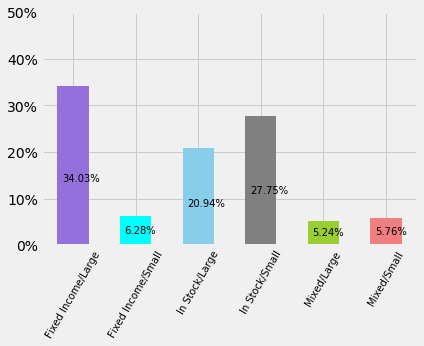

In [12]:
draw_Type_Size_bar_chart(data)

In [13]:
data[['Type','Size']] = data['Type/Size'].str.split(expand=True,pat='/')
# Dropping old Name column "Type/Size" 
data.drop(columns =["The number of institutional investors-percent owned","The number of individual investors-percent owned","Type/Size"], inplace = True)

In [14]:
data['Guarantee Liquidity'].unique()

array(['ندارد', 'ندارد ? ندارد', 'ضامن', 'بانك صادرات ايران',
       'بانك سامان', 'بانك اقتصاد نوين', 'بانك دي', 'ضامن نقد شوندگي',
       'شركت تأمين سرمايه سپهر', 'موسسه بنياد بركت', 'تامين سرمايه تمدن',
       'شركت تامين سرمايه نوين', 'بانك كارآفرين',
       'سرمايه گذاري توسعه ملي - ضامن', 'تامين سرمايه نوين',
       'تامين سرمايه لوتوس پارسيان',
       'شركت تأمين سرمايه سپهر (سهامي خاص)', 'شركت بيمه سامان',
       'شركت آتي نگر سپهر ايرانيان', 'تامين سرمايه بانك مسكن',
       'تامين سرمايه سپهر', 'بانك آينده',
       'تامين سرمايه تمدن (سهامي خاص)', 'بانك پارسيان',
       'شركت سرمايه گذاري ايرانيان', nan, 'گروه مالی مهر اقتصاد',
       'شرکت تامین سرمایه لوتوس پارسیان', 'بانک انصار', 'ندارد -',
       'کارگزاری توسعه سرمایه دنیا', 'ندارد ندارد',
       'شرکت تامین سرمایه امین', 'سرمایه گذاری توسعه صنعتی ایران',
       'نا مشخص', 'این نوع صندوق ندارد.', 'شرکت تأمین سرمایه کاردان',
       'شرکت تأمین سرمایه سپهر', 'نامشخص نامشخص', 'بانک توسعه تعاون',
       'تامین سرمایه 

In [15]:
no_guarantee_list = ['ندارد','ضامن','نامشخص نامشخص','ندارد ? ندارد','ندارد ندارد','ندارد -','این نوع صندوق ندارد.','نامشخص','نا مشخص','ضامن نقد شوندگي']

data.loc[data['Guarantee Liquidity'].isin(no_guarantee_list),'Guarantee Liquidity'] = "None"
data['Guarantee Liquidity']=data['Guarantee Liquidity'].fillna("None")

In [16]:
data.head(5)

fund_number                         Name  \
0        11569         با درآمد ثابت تصمیم   
1        11518  با درآمد ثابت فیروزه آسیا   
2        11334           اندیشه خبرگان سهام   
3        11145          اندوخته پایدار سپهر   
4        11449                   اعتماد ملل   

                             Manager  \
0  سبدگردان تصميم نگار ارزش آفرينان   
1         شركت كارگزاري فيروزه آسيا   
2          مدير-كارگزاري خبرگان سهام   
3             شركت تامين سرمايه سپهر   
4       شركت سبدگردان نوين نگر آسيا   

                                            Trustee Guarantee Liquidity  \
0                      مؤسسه حسابرسي آزموده كاران                None   
1                   موسسه حسابرسي و خدمات مالي فاطر                None   
2  متولي- شركت مشاور سرمايه گذاري تامين سرمايه نوين                None   
3      موسسه حسابرسي و خدمات مديريت ارقام نگر آريا   بانك صادرات ايران   
4                           موسسه حسابرسي داريا روش                None   

                                 Investment Managers  \
0  سجاد سیاح، سید مرتضی لعل سجادی، آمنه شکری قشلاقی   
1        امیرمحمد خدیوی، مجيد علي فر، فرزانه هاشم لو   
2      محمد خیری، جواد جمشید پور پزانی، افسانه قاسمی   
3  مهدي آسيما، الهام خواجه نصیری، سید علی خسرو شاهی   
4                                        امين گلواني   

                              Auditor Starting Date                  Website  \
0   مؤسسه حسابرسي آرمان آروين پارس    1397/03/21  www.tasmimfixedincom.ir   
1       موسسه حسابرسي وانيا نيك تدبير    1396/10/09   www.firouzehfixetf.com   
2          موسسه حسابرسي شاخص انديشان    1394/02/27    www.khobreganfund.com   
3  حسابرسي و خدمات مديريت دايا رهيافت    1392/02/08  www.andukhtesepehr.com/   
4       موسسه حسابرسي ارقام نگر آريا    1395/07/03       msfs.rhbroker.com/   

  Date Updated  ... Last 180 days (%) Last 365 days (%)  \
0   1398/07/15  ...             11.77             22.54   
1   1398/07/15  ...             16.90             31.21   
2   1398/07/15  ...             50.96             78.47   
3   1398/07/15  ...              9.75             19.84   
4   1398/07/15  ...             11.45             23.17   

  Since established date (%)  \
0                      28.06   
1                      59.38   
2                     297.19   
3                     133.24   
4                      68.04   

                                            nav_unit  \
0  {1528659000: {'NAV': 1025289, 'UNIT': 188280},...   
1  {1514579400: {'NAV': 10025, 'UNIT': 43296711},...   
2  {1431804600: {'NAV': 1012577, 'UNIT': 24220}, ...   
3  {1397676600: {'NAV': 996986, 'UNIT': 48999}, 1...   
4  {1474835400: {'NAV': 999973, 'UNIT': 200987}, ...   

  The number of institutional investors  \
0                                     6   
1                                     2   
2                                     5   
3                                   104   
4                                     9   

   The owned percentage by institutional investors  \
0                                           99.00%   
1                                          100.00%   
2                                           98.00%   
3                                            5.00%   
4                                           19.00%   

   The number of individual investors  \
0                                   7   
1                                   0   
2                                  97   
3                               54631   
4                                1712   

   The owned percentage by individual investors          Type   Size  
0                                         1.00%  Fixed Income  Large  
1                                         0.00%  Fixed Income  Large  
2                                         2.00%      In Stock  Small  
3                                        95.00%  Fixed Income  Large  
4                                        81.00%  Fixed Income  Large  

[5 rows x 32 columns]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 32 columns):
fund_number                                        191 non-null int64
Name                                               191 non-null object
Manager                                            191 non-null object
Trustee                                            191 non-null object
Guarantee Liquidity                                191 non-null object
Investment Managers                                189 non-null object
Auditor                                            191 non-null object
Starting Date                                      191 non-null object
Website                                            189 non-null object
Date Updated                                       191 non-null object
Total NAV(Rls)                                     191 non-null object
Total UNITs                                        191 non-null object
The issue price per Unit (IRR)              

In [18]:
def draw_type_total_bar(ind_data,inst_data):
    # set width of bar
    barWidth = 0.25
    plt.rcParams.update({'font.size': 25})
    plt.figure(figsize=(30,20))
    # Set position of bar on X axis
    r1 = np.arange(len(ind_data))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    ax1 = plt.bar(r1, ind_data, color='steelblue', width=barWidth, edgecolor='gray', label='individual')
    ax2 = plt.bar(r1, inst_data, bottom=ind_data, color='red', width=barWidth, edgecolor='gray', label='institutional')


    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + 1.5*r1.get_width()+0.03 , h1 / 2., "{:.2%}".format(h1), ha="right", va="center", color="steelblue")
        plt.text(r2.get_x()+ r2.get_width()/2 , h1 + h2+.02, "{:.2%}".format(h2), ha="center", va="center", color="red")

    # Add xticks on the middle of the group bars
    plt.xlabel('The type of mutual fund', fontweight='bold')
    plt.ylabel('The percentage of investors', fontweight='bold')

    plt.xticks([r  for r in range(len(ind_data))], ['Fixed Income', 'In Stock', 'Mixed'])
    labels = np.arange(0,1.1,0.1)
    plt.yticks(labels, ["{:.0%}".format(l) for l in labels])
    # Create legend & Show graphic
    plt.legend()
    plt.show()

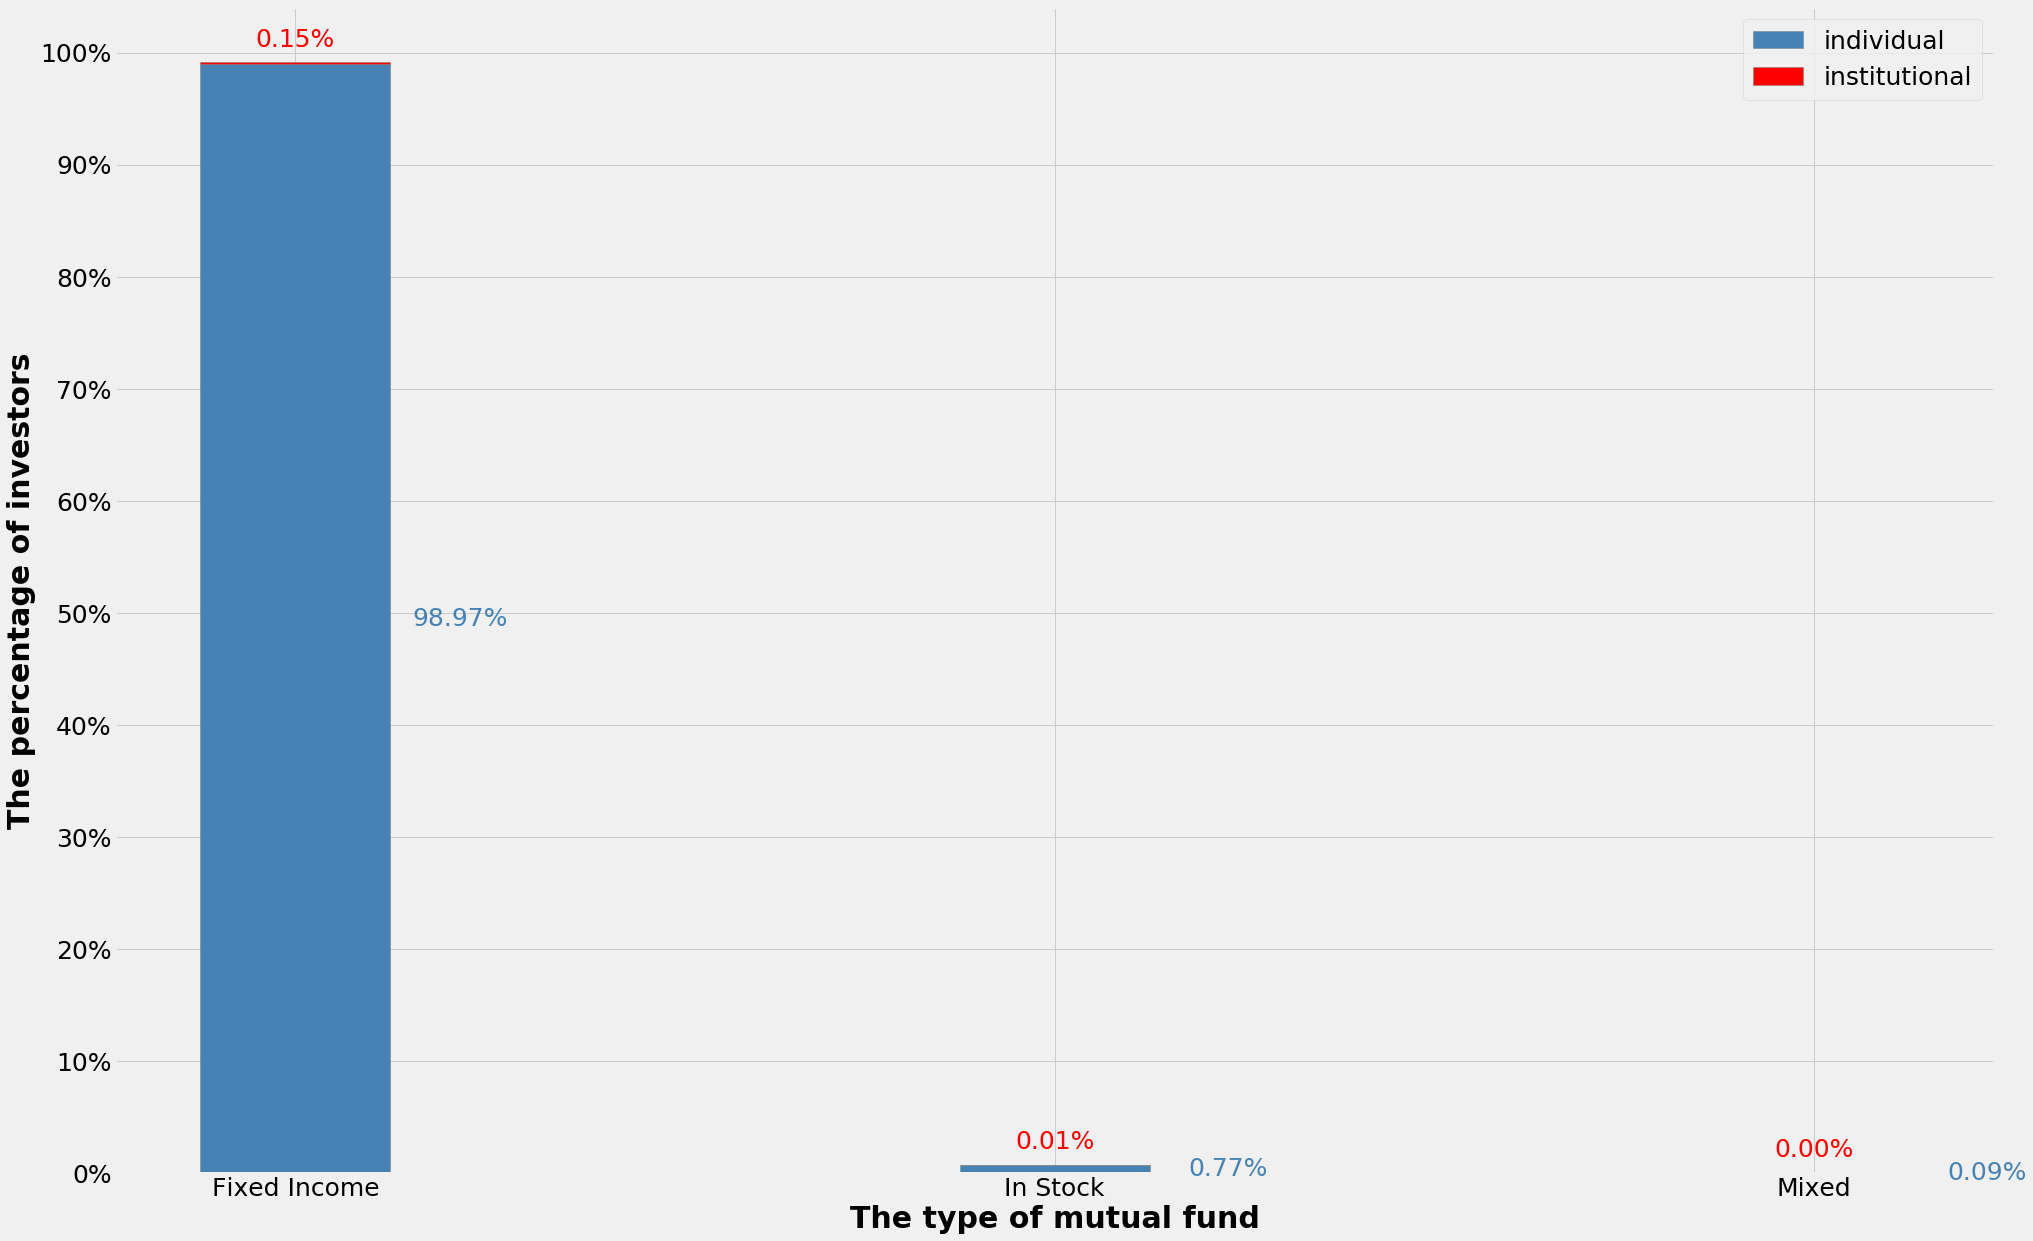

In [19]:
aggre=data.loc[data['Guarantee Liquidity'] != "None"].groupby('Type')['The number of individual investors'].sum()
s1 = sum(aggre)

aggre2=data.loc[data['Guarantee Liquidity'] != "None"].groupby('Type')['The number of institutional investors'].sum()
s2 = sum(aggre2)
bars1 = aggre.map(lambda x: x/(s1+s2))
bars2 = aggre2.map(lambda x: x/(s2+s1))
draw_type_total_bar(bars1, bars2)

In [20]:
def draw_type_pie(data1, data2):
    colors = ['cadetblue', 'yellow', 'red']
    labels = ['Fixed Income', 'In Stock', 'Mixed']
    explode = (0,0.1,0.4)

    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"), ncols=2)
    
    ax[0].pie(data1*100, autopct='%1.1f%%',
              textprops=dict(color="black",fontsize=20,weight="bold"),
             startangle=160, pctdistance=0.8, 
              explode = explode,colors = colors)
    
    wedges, texts, autotexts = ax[1].pie(data2*100, autopct='%1.1f%%',
              textprops=dict(color="black",fontsize=20,weight="bold"),
             startangle=160, pctdistance=0.8, 
              explode = explode,colors = colors)

    ax[1].legend(wedges, labels,
              title="Type",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1),
              fontsize='x-small')

    ax[0].set_title("Individual Investors")
    ax[1].set_title("Institutional Investors")

    plt.show()

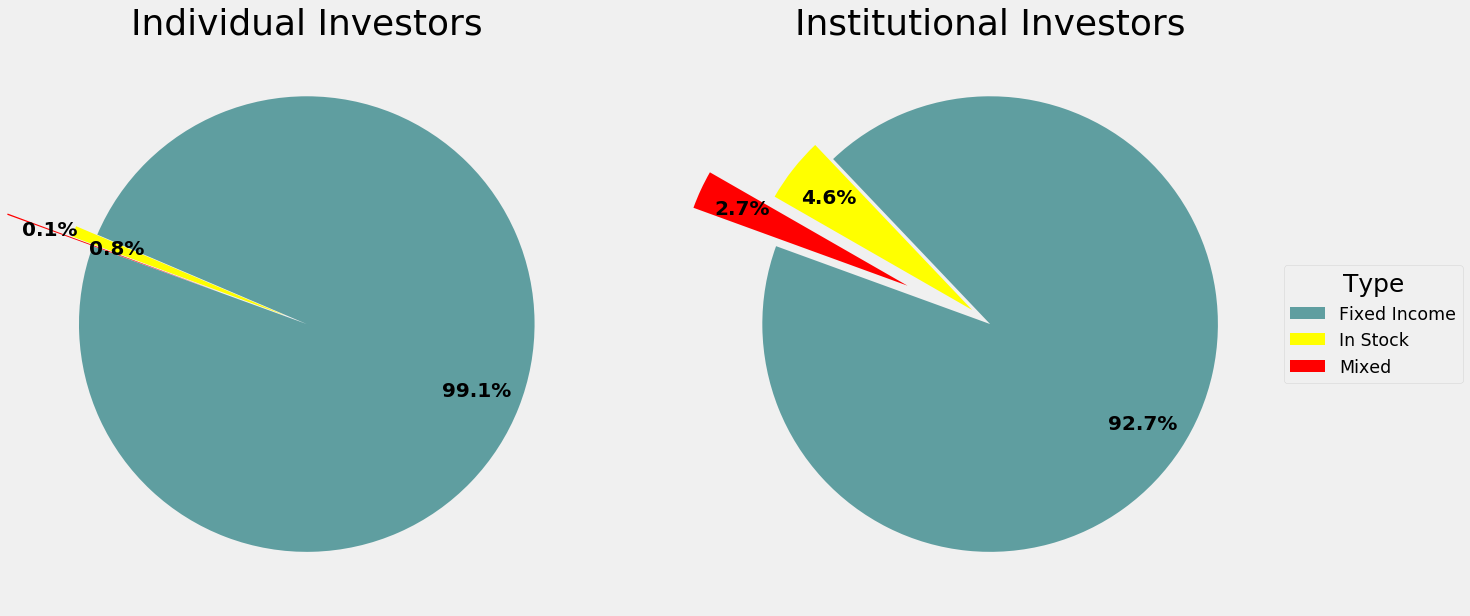

In [21]:
bars1 = aggre.map(lambda x: x/(s1))
bars2 = aggre2.map(lambda x: x/(s2))
draw_type_pie(bars1,bars2)

In [22]:
data.iloc[0]

fund_number                                                                                    11569
Name                                                                            با درآمد ثابت تصمیم
Manager                                                            سبدگردان تصميم نگار ارزش آفرينان
Trustee                                                                 مؤسسه حسابرسي آزموده كاران
Guarantee Liquidity                                                                             None
Investment Managers                                سجاد سیاح، سید مرتضی لعل سجادی، آمنه شکری قشلاقی
Auditor                                                            مؤسسه حسابرسي آرمان آروين پارس
Starting Date                                                                             1397/03/21
Website                                                                      www.tasmimfixedincom.ir
Date Updated                                                                              1

In [23]:
data.loc[data['Guarantee Liquidity'] != "None"].groupby('Type').agg({'Last 365 days (%)':'mean', 'Last 180 days (%)':'mean','Last 90 days (%)':'mean','Last 30 days (%)':'mean','Last 7 days (%)':'mean','Last 1 day (%)':'mean'})


Last 365 days (%)  Last 180 days (%)  Last 90 days (%)  \
Type                                                                   
Fixed Income          21.905769          11.112308          5.418462   
In Stock              81.380526          63.895789         29.284737   
Mixed                 60.286667          39.840000         17.250000   

              Last 30 days (%)  Last 7 days (%)  Last 1 day (%)  
Type                                                             
Fixed Income          1.882308         0.354231        0.095385  
In Stock              8.470000         1.686842        0.428421  
Mixed                 6.351667         0.905000        0.248333

In [24]:
data['has_guarantee'] = data['Guarantee Liquidity']!="None"

In [25]:
def draw_bar_chart(input_data):
    plt.subplots(figsize=(8,6))
    plt.style.use('fivethirtyeight')
    
    ax = input_data.value_counts(normalize = True).sort_index().plot(kind='bar',
                                                        color = tuple(["lightsalmon", "darkseagreen","r","y","k"]))
    for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                ax.annotate('{0}%'.format(round(p.get_height()*100,2)), (p.get_x()+width/2.5, p.get_y()+.5*height),size=12)

    plt.ylim(0,.8)
    plt.xticks(rotation=0,size=10)
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

    plt.show()

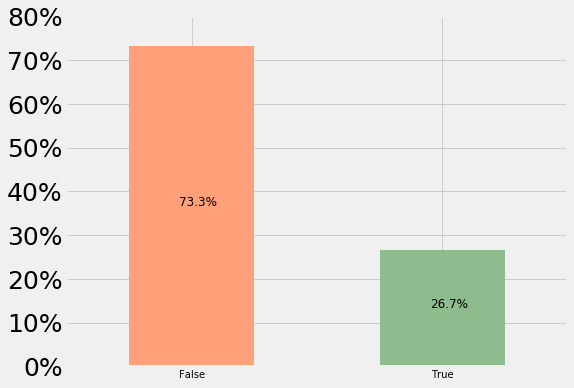

In [26]:
draw_bar_chart(data['has_guarantee'])

In [27]:
data['has_guarantee'].value_counts(normalize = True).sort_index()

False    0.732984
True     0.267016
Name: has_guarantee, dtype: float64

In [28]:
s = data.groupby(['Type']).size()

In [29]:
grouped_ = sorted(data.groupby(['Type','has_guarantee'])
                  .size().unstack(0).div(s).mul(100).round(2)
                  .to_dict().items(), key=lambda item: item[1][False])

In [30]:
false_ = {item[0]:item[1][False] for item in grouped_}

In [31]:
true_ = {item[0]:item[1][True] for item in grouped_}

In [32]:
def draw_guarantee_total_bar(false_data,true_data):
    # set width of bar
    barWidth = 0.25
    plt.rcParams.update({'font.size': 25})
    plt.figure(figsize=(30,20))
    # Set position of bar on X axis
    r1 = np.arange(len(false_data))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    ax1 = plt.bar(r1, false_data, color='lightcoral', width=barWidth, edgecolor='gray', label='No Guarantee')
    ax2 = plt.bar(r1, true_data, bottom=false_data, color='steelblue', width=barWidth, edgecolor='gray', label='With Guarantee')


    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width()/2 , h1 / 2., "{}%".format(h1), ha="center", va="center", color="black")
        plt.text(r2.get_x()+ r2.get_width()/2 , h1 + h2/2, "{}%".format(h2), ha="center", va="center", color="black")

    # Add xticks on the middle of the group bars
    plt.xlabel('The type of mutual fund')
#     plt.ylabel('The percentage of investors', fontweight='bold')

    plt.xticks([r  for r in range(len(false_data))], ['Fixed Income', 'In Stock', 'Mixed'])
#     labels = np.arange(0,1.1,0.1)
#     plt.yticks(labels, ["{:.0%}".format(l) for l in labels])
    # Create legend & Show graphic
    plt.legend()
    plt.show()

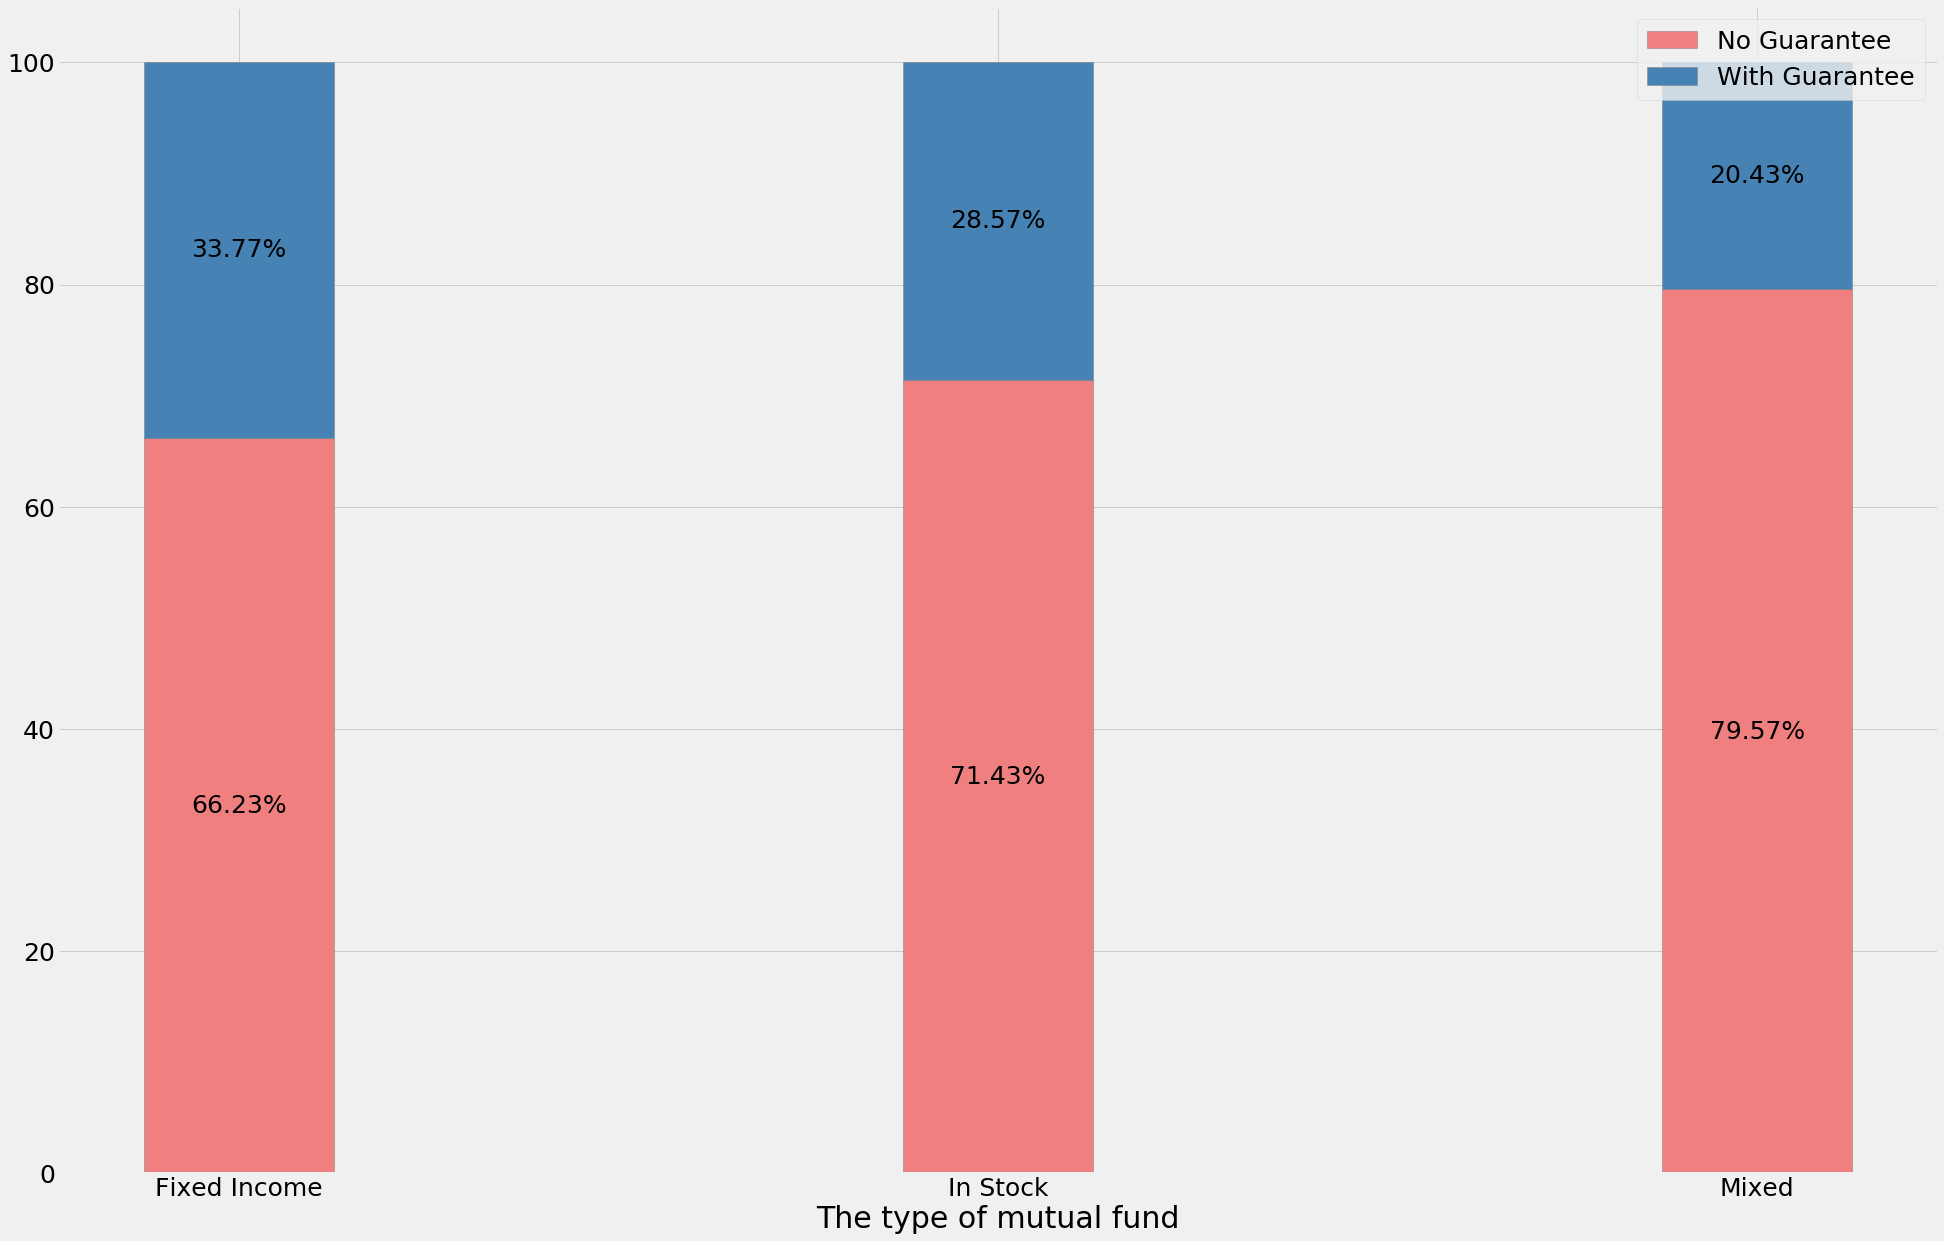

In [33]:
draw_guarantee_total_bar(list(false_.values()),list(true_.values()))